## Exploratory Visualization [15 marks]
## Using Seaborn, perform the following tasks: a. Plot the distribution of Profit.
## b. Create a barplot of average Sales grouped by Region.
## c. Display a boxplot showing the spread of Profit for each Product Category.
## Hint: Add color palettes and plot titles to improve visualization.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('retail_sales (1).csv')
df



#sns.barplot(df[''])

,Order ID,Order Date,Region,Product Category,Sub-Category,Sales,Profit,Quantity,Discount
0,ORD-1000,2022-04-13,West,Furniture,Tables,1597.16,158.64,8,0.2
1,ORD-1001,2023-09-07,East,Furniture,Chairs,902.75,-29.92,8,0.2
2,ORD-1002,2023-10-26,East,Office Supplies,Binders,1308.76,210.71,2,0.0
3,ORD-1003,2023-02-18,Central,Furniture,Bookcases,440.43,47.89,5,0.3
4,ORD-1004,2022-11-10,Central,Office Supplies,Pens,1059.02,-57.60,9,0.3
...,...,...,...,...,...,...,...,...,...
195,ORD-1195,2023-02-11,East,Office Supplies,Binders,263.17,-30.85,5,0.0
196,ORD-1196,2023-02-24,East,Office Supplies,Binders,266.83,62.69,1,0.0
197,ORD-1197,2023-07-21,East,Furniture,Bookcases,470.24,-4.87,5,0.2
198,ORD-1198,2022-11-05,West,Furniture,Tables,683.69,-135.15,9,0.3


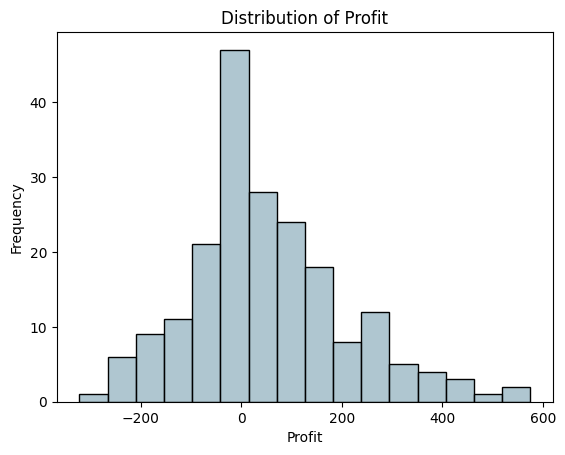

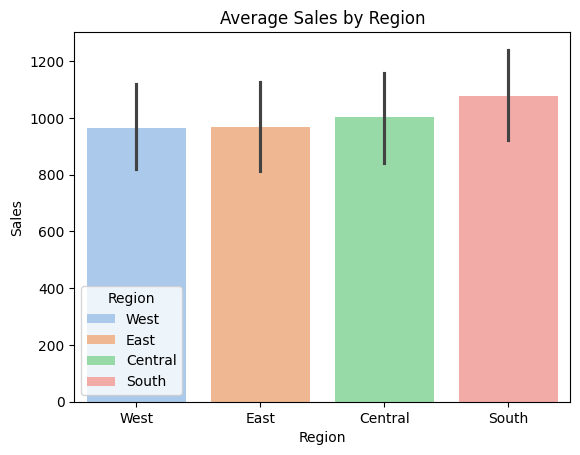

C:\Users\HP\AppData\Local\Temp\ipykernel_21408\1973604254.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Product Category',y='Profit',palette='viridis')


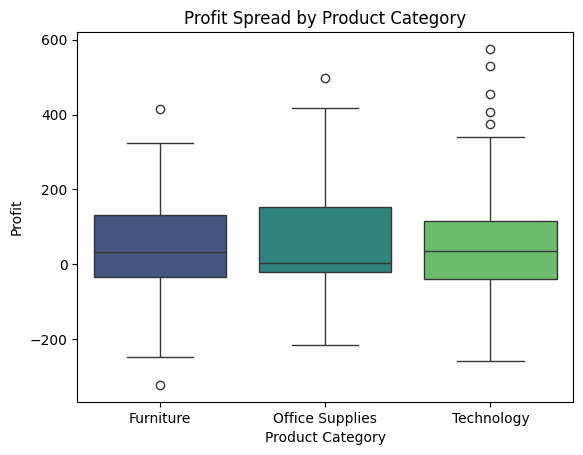

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('retail_sales (1).csv')
df

sns.histplot(df['Profit'],color='#94B4C1',legend='True')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

#  b. Barplot of average Sales grouped by Region
sns.barplot(data=df,x='Region',y='Sales',palette='pastel',hue='Region',legend=True)
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# c. Display a boxplot showing the spread of Profit for each Product Category.
sns.boxplot(data=df,x='Product Category',y='Profit',palette='viridis')
plt.title('Profit Spread by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.show()

## Q2: Time Series Visualization [10 marks]
## Using Matplotlib, draw a line chart to show total monthly sales from the Order
## Date.
## • Ensure the x-axis displays months and years (e.g., Jan-2023).
## • Mark months with negative total profit in red.

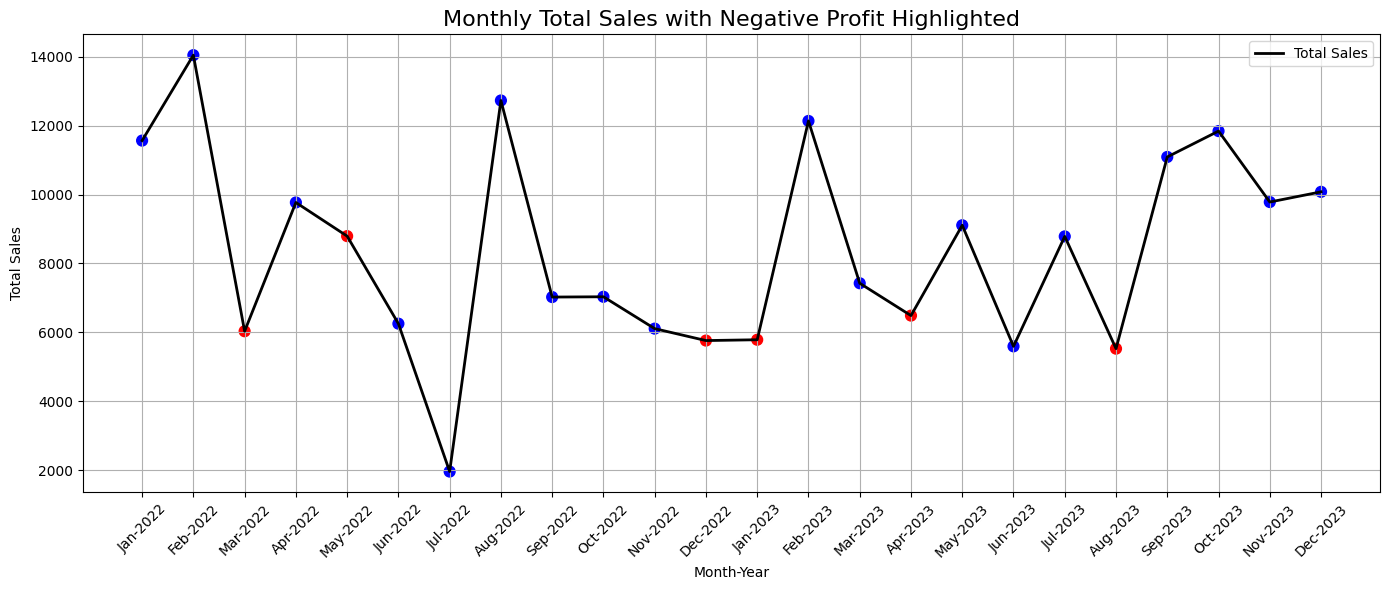

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_data = df.resample('ME', on = 'Order Date').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
monthly_data['Month-Year'] = monthly_data['Order Date'].dt.strftime('%b-%Y')
plt.figure(figsize=(14,6))
colors = ['red' if p<0 else 'blue' for p in monthly_data['Profit']]

plt.plot(monthly_data['Month-Year'],monthly_data['Sales'],color='black',linewidth=2,label='Total Sales')
plt.scatter(monthly_data['Month-Year'],monthly_data['Sales'],color=colors,s=60)

plt.xticks(rotation=45)
plt.title('Monthly Total Sales with Negative Profit Highlighted', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Q3: Correlation Analysis [10 marks]
## • Create a correlation heatmap using Seaborn for the numerical variables: Sales,
## Profit, Quantity, and Discount.
## • Question:
## What relationship do you observe between discount and profit?

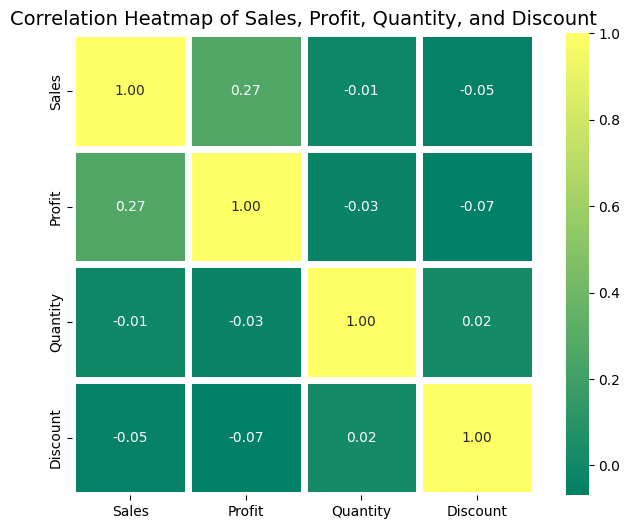

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant numerical columns
corr_data = df[['Sales','Profit','Quantity','Discount']]
corr_matrix = corr_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'summer', fmt='.2f', square=True,linewidth=5)
plt.title('Correlation Heatmap of Sales, Profit, Quantity, and Discount', fontsize=14)
plt.show()



## Custom Plot Styling [15 marks]
## Combine Seaborn and Matplotlib to create:
## • A scatter plot of Sales vs Profit, with point size representing Quantity, and hue as
## Region.
## • Add a trendline using regplot() or lmplot().
## • Customize the chart with a legend, axis labels, and title

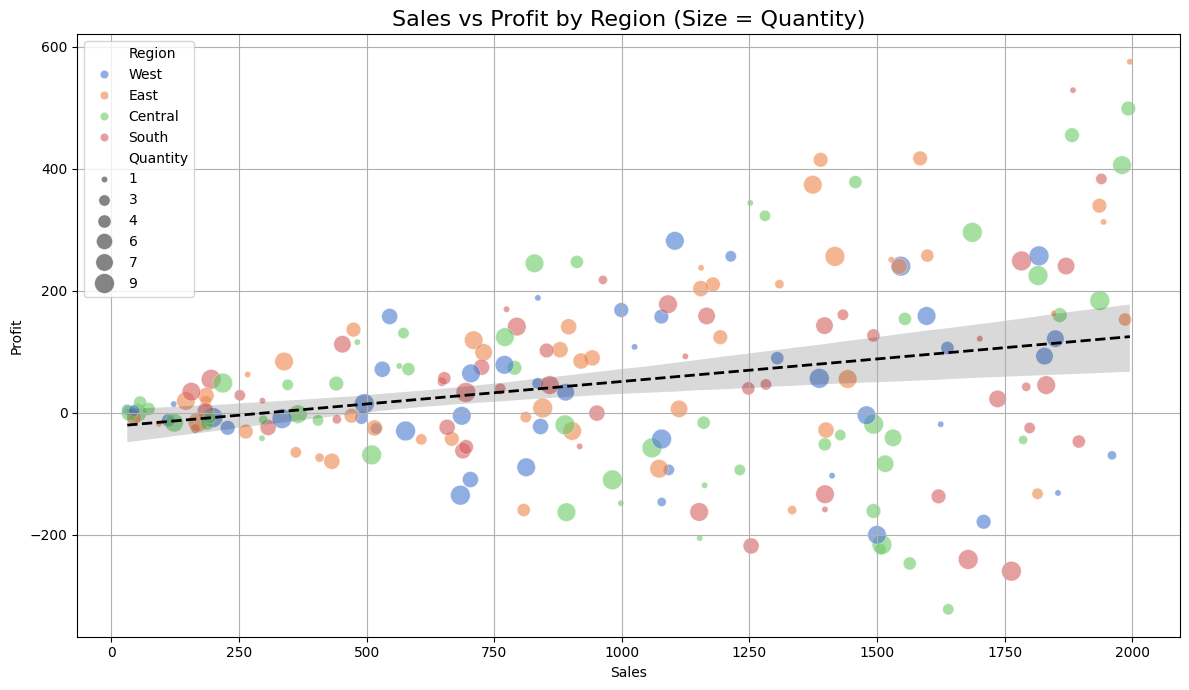

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))

sns.scatterplot(
    data=df,
    x='Sales',
    y='Profit',
    hue='Region',
    size='Quantity',
    sizes=(20, 200),
    alpha=0.6,
    palette='muted'
)

sns.regplot(
    data=df,
    x='Sales',
    y='Profit',
    scatter=False,
    color='black',
    line_kws={'linestyle':'--','linewidth':2},
    label='Trendline'

)


plt.title('Sales vs Profit by Region (Size = Quantity)',fontsize=16)
plt.xlabel('Sales')
plt.ylabel('Profit')
legend=True
plt.grid(True)
plt.tight_layout()
plt.show()